# **PHISHGUARD: A Comprehensive Framework for Phishing Website Detection Using Machine Learning and Ensemble Models**

# Importing Required Libraries

In [1]:
# !source my_new_env/bin/activate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostClassifier

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Filter warnings
warnings.filterwarnings('ignore')

# Dataset 02

## need to update
The dataset is borrowed from [Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .](https://archive.ics.uci.edu/dataset/327/phishing+websites)

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


- samples: 88647
- features: 111

In [3]:
#Loading data into dataframe

file_path = 'dataset2.csv'
data1 = pd.read_csv(file_path)


In [4]:
data1.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [5]:
data1.shape

(88647, 112)

In [6]:
list(data1.columns)

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [8]:
# nunique value in columns

data1.nunique()

qty_dot_url             23
qty_hyphen_url          30
qty_underline_url       22
qty_slash_url           25
qty_questionmark_url     6
                        ..
qty_redirects           15
url_google_index         3
domain_google_index      3
url_shortened            2
phishing                 2
Length: 112, dtype: int64

In [9]:
# We can see that there are no missing values in the Dataset
for col in data1.columns:
    unique_value_list = data1[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data1[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

qty_dot_url has 23 unique values
qty_hyphen_url has 30 unique values
qty_underline_url has 22 unique values
qty_slash_url has 25 unique values
qty_questionmark_url contains:			[0 1 2 3 9 7]
qty_equal_url has 20 unique values
qty_at_url has 15 unique values
qty_and_url has 21 unique values
qty_exclamation_url contains:			[ 0  1  8  2  5  3  4  9  6 10]
qty_space_url contains:			[0 1 4 9 3 2 7 6]
qty_tilde_url contains:			[0 1 5 3 4 2]
qty_comma_url contains:			[ 0  1  4  3  2  5 11  7]
qty_plus_url contains:			[ 0  2  1  5  4  3  6  9 19  7]
qty_asterisk_url has 18 unique values
qty_hashtag_url contains:			[ 0  2  9  3  1 13  7]
qty_dollar_url contains:			[ 0  1  6  3  9  8  2 10  5  4]
qty_percent_url has 52 unique values
qty_tld_url contains:			[ 1  3  2  0  4  5 12  7  9]
length_url has 453 unique values
qty_dot_domain has 19 unique values
qty_hyphen_domain has 12 unique values
qty_underline_domain contains:			[0 1 2 3]
qty_slash_domain contains:			[0]
qty_questionmark_domain contain

In [10]:
#description of dataset

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.0,2.0,2.0,24.0
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.0,0.0,0.0,35.0
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.0,0.0,0.0,21.0
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.0,0.0,2.0,44.0
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...
qty_redirects,88647.0,0.343903,0.783892,-1.0,0.0,0.0,1.0,17.0
url_google_index,88647.0,0.001410,0.058640,-1.0,0.0,0.0,0.0,1.0
domain_google_index,88647.0,0.002019,0.063250,-1.0,0.0,0.0,0.0,1.0
url_shortened,88647.0,0.005482,0.073841,0.0,0.0,0.0,0.0,1.0


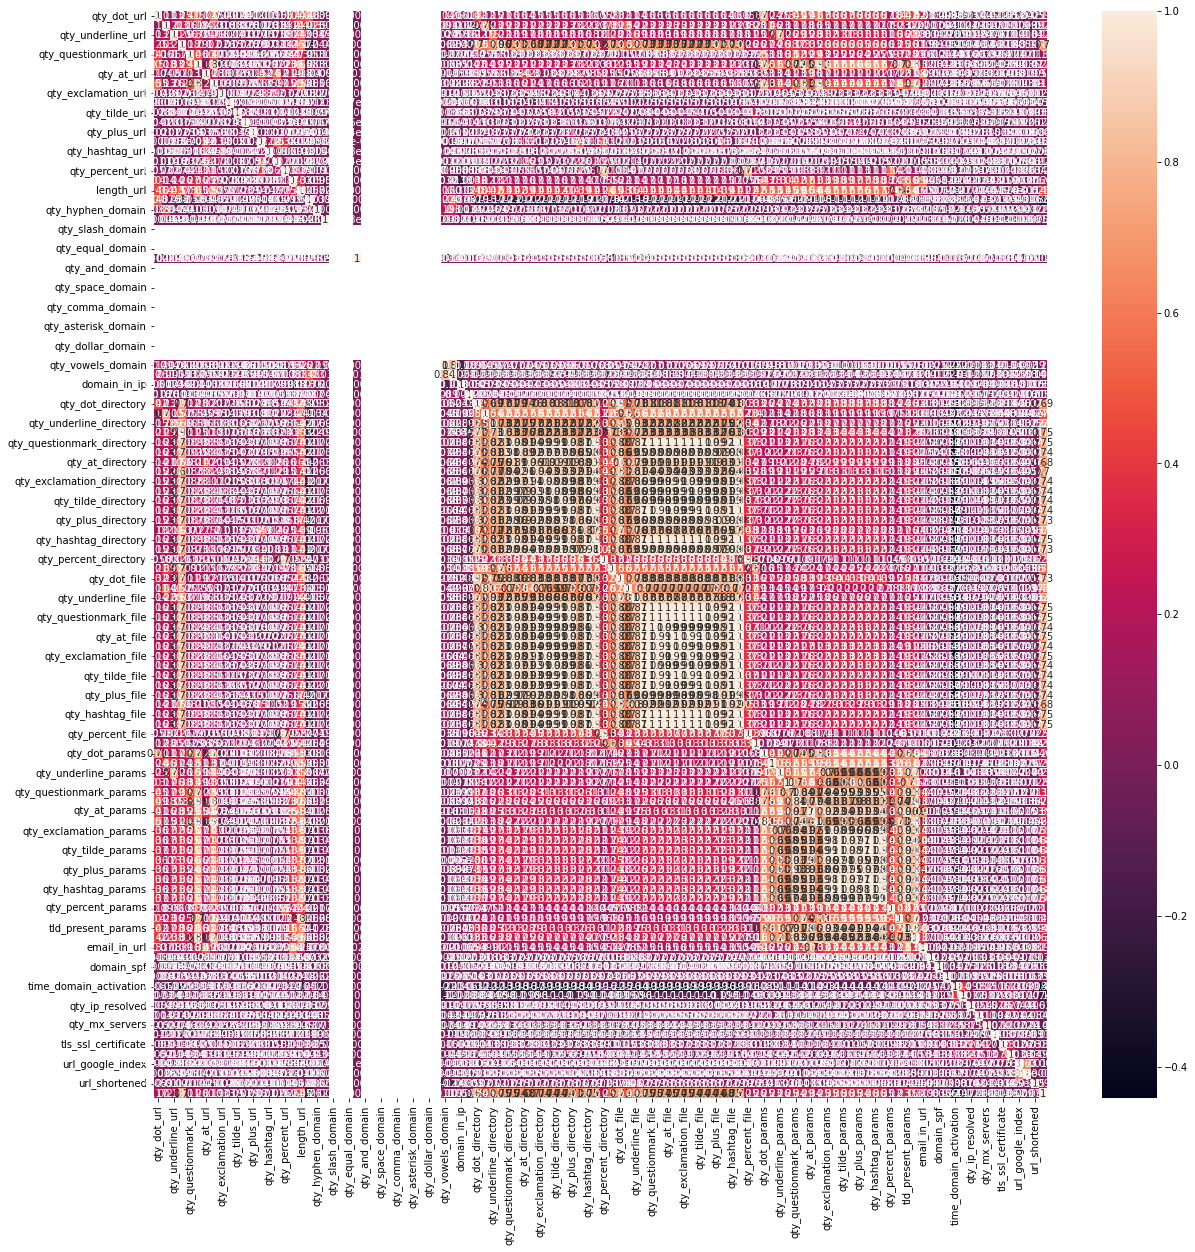

In [11]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

### Distribution of Phishing and Legitimate Sites in Dataset

0    58000
1    30647
Name: phishing, dtype: int64


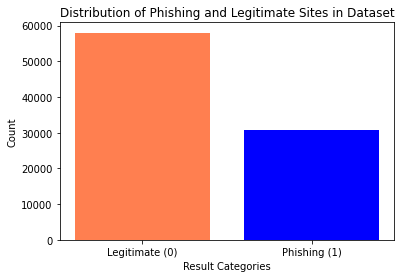

In [12]:
# Count the occurrences of each category in the 'Result' column
result_counts = data1['phishing'].value_counts()
print(data1['phishing'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (0)','Phishing (1)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

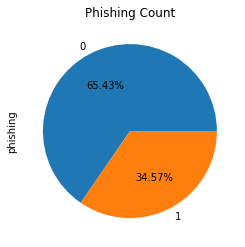

In [13]:
# Phishing Count in pie chart

data1['phishing'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

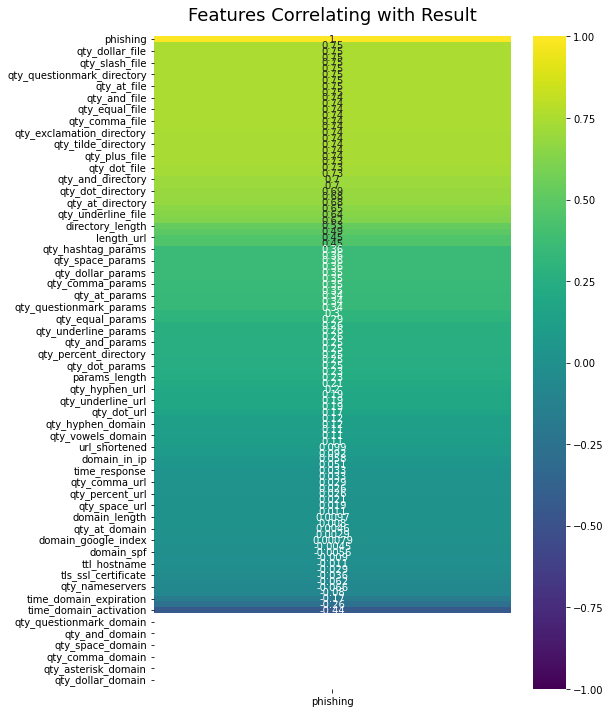

In [14]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data1.corr()[['phishing']].sort_values(by='phishing', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [15]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

In [16]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X = data1.drop(["phishing"], axis=1)
y = data1["phishing"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 1: After Normalization (but before oversampling)
# configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply Variance Thresholding (Remove features with low variance)
print("\n=== Variance Thresholding ===")
selector = VarianceThreshold(threshold=0.1)  # You can adjust the threshold value based on needs
X_train_variance_reduced = selector.fit_transform(X_train_normalized)
X_test_variance_reduced = selector.transform(X_test_normalized)  # Apply the same transformation to the test set

# Configuration 2: After Variance Thresholding
configurations.append(('Variance Thresholding', X_train_variance_reduced, X_test_variance_reduced, y_train))

# # Step 4: Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_variance_reduced, y_train)

# # Configuration 3: After SMOTE (before normalization)
# configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# # Step 5: Apply SMOTE followed by Normalization
# X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
# X_test_normalized_smote = scaler.transform(X_test_variance_reduced)  # Apply the same scaling to the test set

# # Configuration 4: After SMOTE and Normalization
# configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))


=== Variance Thresholding ===


---

# Support Vector Machine Classifier



In [17]:
# Step 6: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [10],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # GridSearchCV to find the best parameters for the SVC model
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

    # Fitting the model for grid search with the training data
    svc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Support Vector Machine',
                 name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Variance Thresholding configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.863559  0.831763 0.975131   0.725148 0.873691
    Test  0.869769  0.838203 0.977607   0.733595 0.881398
Best hyperparameters found by GridSearchCV:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# Random Forest Classifier


In [18]:
# Step 6: Run RandomForestClassifier with Hyperparameter Tuning on different configurations
print("\n=== Random Forest Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2'],
    'bootstrap': [False],
    'criterion': ['gini', 'entropy']
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Random Forest with {name} configuration...")

    # GridSearchCV to find the best parameters for the RandomForestClassifier
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)  # 5-fold cross-validation

    # Fitting the model for grid search with the training data
    rf.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_rf = rf.predict(X_train_cfg)
    y_test_rf = rf.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_rf_proba = rf.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_rf_proba = rf.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Random Forest model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_rf),
            metrics.accuracy_score(y_test, y_test_rf),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_rf),
            metrics.f1_score(y_test, y_test_rf),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_rf),
            metrics.recall_score(y_test, y_test_rf),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_rf),
            metrics.precision_score(y_test, y_test_rf),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_rf_proba),
            metrics.roc_auc_score(y_test, y_test_rf_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nRandom Forest Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Random Forest',
                 name,
                 metrics.accuracy_score(y_test, y_test_rf),
                 metrics.f1_score(y_test, y_test_rf),
                 metrics.recall_score(y_test, y_test_rf),
                 metrics.precision_score(y_test, y_test_rf),
                 metrics.roc_auc_score(y_test, y_test_rf_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(rf.best_params_)


=== Random Forest Model Performance with Hyperparameter Tuning ===

Running Random Forest with Variance Thresholding configuration...

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.863559  0.831763 0.975131   0.725148 0.907523
    Test  0.869769  0.838203 0.977607   0.733595 0.910670
Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Gradient Boosting Classifier

In [19]:
# Step 6: Run GradientBoostingClassifier with Hyperparameter Tuning on different configurations
print("\n=== Gradient Boosting Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 6, 7]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Gradient Boosting with {name} configuration...")

    # GridSearchCV to find the best parameters for the GradientBoostingClassifier
    gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    gbc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_gbc = gbc.predict(X_train_cfg)
    y_test_gbc = gbc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_gbc_proba = gbc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_gbc_proba = gbc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Gradient Boosting model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_gbc),
            metrics.accuracy_score(y_test, y_test_gbc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_gbc),
            metrics.f1_score(y_test, y_test_gbc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_gbc),
            metrics.recall_score(y_test, y_test_gbc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_gbc),
            metrics.precision_score(y_test, y_test_gbc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_gbc_proba),
            metrics.roc_auc_score(y_test, y_test_gbc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nGradient Boosting Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Gradient Boosting',
                 name,
                 metrics.accuracy_score(y_test, y_test_gbc),
                 metrics.f1_score(y_test, y_test_gbc),
                 metrics.recall_score(y_test, y_test_gbc),
                 metrics.precision_score(y_test, y_test_gbc),
                 metrics.roc_auc_score(y_test, y_test_gbc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(gbc.best_params_)


=== Gradient Boosting Model Performance with Hyperparameter Tuning ===

Running Gradient Boosting with Variance Thresholding configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.863559  0.831763 0.975131   0.725148 0.907523
    Test  0.869769  0.838203 0.977607   0.733595 0.910670
Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


# CatBoost Classifier

In [20]:
# Step 6: Run CatBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== CatBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'depth': [6, 8, 10],
    'iterations': [200, 300, 400]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning CatBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the CatBoostClassifier
    cat = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    cat.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_cat = cat.predict(X_train_cfg)
    y_test_cat = cat.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_cat_proba = cat.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_cat_proba = cat.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the CatBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_cat),
            metrics.accuracy_score(y_test, y_test_cat),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_cat),
            metrics.f1_score(y_test, y_test_cat),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_cat),
            metrics.recall_score(y_test, y_test_cat),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_cat),
            metrics.precision_score(y_test, y_test_cat),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_cat_proba),
            metrics.roc_auc_score(y_test, y_test_cat_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nCatBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('CatBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_cat),
                 metrics.f1_score(y_test, y_test_cat),
                 metrics.recall_score(y_test, y_test_cat),
                 metrics.precision_score(y_test, y_test_cat),
                 metrics.roc_auc_score(y_test, y_test_cat_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(cat.best_params_)


=== CatBoost Model Performance with Hyperparameter Tuning ===

Running CatBoost with Variance Thresholding configuration...


TBB Warning: The number of workers is currently limited to 11. The request for 63 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.




CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.863559  0.831763 0.975131   0.725148 0.907523
    Test  0.869769  0.838203 0.977607   0.733595 0.910670
Best hyperparameters found by GridSearchCV:
{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}


# AdaBoost Classifier

In [21]:
# Step 6: Run AdaBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== AdaBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning AdaBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the AdaBoostClassifier
    ada = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    ada.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_ada = ada.predict(X_train_cfg)
    y_test_ada = ada.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_ada_proba = ada.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_ada_proba = ada.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the AdaBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_ada),
            metrics.accuracy_score(y_test, y_test_ada),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_ada),
            metrics.f1_score(y_test, y_test_ada),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_ada),
            metrics.recall_score(y_test, y_test_ada),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_ada),
            metrics.precision_score(y_test, y_test_ada),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_ada_proba),
            metrics.roc_auc_score(y_test, y_test_ada_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nAdaBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('AdaBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_ada),
                 metrics.f1_score(y_test, y_test_ada),
                 metrics.recall_score(y_test, y_test_ada),
                 metrics.precision_score(y_test, y_test_ada),
                 metrics.roc_auc_score(y_test, y_test_ada_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(ada.best_params_)


=== AdaBoost Model Performance with Hyperparameter Tuning ===

Running AdaBoost with Variance Thresholding configuration...

AdaBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.863559  0.831763 0.975131   0.725148 0.889847
    Test  0.869769  0.838203 0.977607   0.733595 0.895280
Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.01, 'n_estimators': 50}


# XGBoost Classifier

In [22]:
# Step 6: Run XGBoost with Hyperparameter Tuning on different configurations
print("\n=== XGBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning XGBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the XGBoost model
    xgbm = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    xgbm.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_xgbm = xgbm.predict(X_train_cfg)
    y_test_xgbm = xgbm.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_xgbm_proba = xgbm.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_xgbm_proba = xgbm.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the XGBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_xgbm),
            metrics.accuracy_score(y_test, y_test_xgbm),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_xgbm),
            metrics.f1_score(y_test, y_test_xgbm),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_xgbm),
            metrics.recall_score(y_test, y_test_xgbm),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_xgbm),
            metrics.precision_score(y_test, y_test_xgbm),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_xgbm_proba),
            metrics.roc_auc_score(y_test, y_test_xgbm_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nXGBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('XGBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_xgbm),
                 metrics.f1_score(y_test, y_test_xgbm),
                 metrics.recall_score(y_test, y_test_xgbm),
                 metrics.precision_score(y_test, y_test_xgbm),
                 metrics.roc_auc_score(y_test, y_test_xgbm_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(xgbm.best_params_)


=== XGBoost Model Performance with Hyperparameter Tuning ===

Running XGBoost with Variance Thresholding configuration...

XGBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.863559  0.831763 0.975131   0.725148 0.907523
    Test  0.869769  0.838203 0.977607   0.733595 0.910670
Best hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [23]:
# Creating the dataframe
result = pd.DataFrame({
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})

# Displaying the result
print(result)

# Saving the result to a CSV file
result.to_csv('model_results2.csv', index=False)

# Sorting the dataframe on accuracy and F1 Score
sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)

# Displaying the sorted result
print(sorted_result)

# Saving the sorted result to a CSV file
sorted_result.to_csv('sorted_model_results2.csv', index=False)

                 ML Model          Configuration Accuracy F1 Score   Recall  \
0  Support Vector Machine  Variance Thresholding  86.977%  83.820%  97.761%   
1           Random Forest  Variance Thresholding  86.977%  83.820%  97.761%   
2       Gradient Boosting  Variance Thresholding  86.977%  83.820%  97.761%   
3                CatBoost  Variance Thresholding  86.977%  83.820%  97.761%   
4                AdaBoost  Variance Thresholding  86.977%  83.820%  97.761%   
5                 XGBoost  Variance Thresholding  86.977%  83.820%  97.761%   

  Precision  ROC_AUC  
0   73.359%  88.140%  
1   73.359%  91.067%  
2   73.359%  91.067%  
3   73.359%  91.067%  
4   73.359%  89.528%  
5   73.359%  91.067%  
                 ML Model          Configuration Accuracy F1 Score   Recall  \
0  Support Vector Machine  Variance Thresholding  86.977%  83.820%  97.761%   
1           Random Forest  Variance Thresholding  86.977%  83.820%  97.761%   
2       Gradient Boosting  Variance Thresholding